In [2]:
import tensorflow as tf
import numpy as np
import os
import sys, qiskit
sys.path.insert(0, '../..')
from base import metrics
import re


# Function to read and parse the tensor data from a text file
def parse_tensor_from_file(file_path, shape):
    with open(file_path, 'r') as file:
        # Read the content of the file
        tensor_str = file.read()
    # Split the cleaned string into components
    components = re.findall(r"([+-]?\d+\.?\d*[eE]?[+-]?\d*(?:\s*[+-]?\d*\.?\d*[eE]?[+-]?\d*j)?)", tensor_str)
    # Convert the components into a numpy array of complex numbers
    complex_numbers = [complex(c.replace(' ','')) for c in components]

    # Convert the list to a NumPy array and reshape it
    numpy_tensor = np.array(complex_numbers, dtype=np.complex128)

    if (shape == 3):
        numpy_tensor = numpy_tensor.reshape(round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)))
    if (shape == 2):
        size = numpy_tensor.size
        new_shape = (round(size ** (1/shape)), round(size ** (1/shape))) if shape == 2 else (size,)
        numpy_tensor = numpy_tensor.reshape(new_shape)
    # Convert NumPy array to TensorFlow tensor
    tf_tensor = tf.convert_to_tensor(numpy_tensor)

    return tf_tensor

2025-03-02 00:04:46.483208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 00:04:46.483732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 00:04:46.486244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 00:04:46.493629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740841486.506778   27827 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740841486.51

In [3]:
import matplotlib.pyplot as plt

def get_colors(array, pos_color, neg_color):
    # Create an array of colors based on the values in the input array
    return [pos_color if value > 0 else neg_color for value in array.flatten()]

def plot_array(array1, array2, array3, array4, title1, title2, title3, title4, label1, label2, file_name):
    # Create the figure and 3D axes
    fig = plt.figure(figsize=(10, 11))  # Tăng chiều cao để tạo không gian cho cả hai hàng
    
    # Grid positions for the bars
    x, y = np.meshgrid(np.arange(array1.shape[0]), np.arange(array1.shape[1]))
    
    # Flatten the grid and array values for easy plotting
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)  # Base height of the bars (all start from z=0)
    
    # Colors for positive and negative values
    pos_color1 = 'teal'
    pos_color2 = 'purple'
    neg_color = 'red'
    
    # First plot with bars for Array 1
    ax1 = fig.add_subplot(221, projection='3d')
    colors1 = get_colors(array1, pos_color1, neg_color)
    ax1.bar3d(x, y, z, dx=0.5, dy=0.5, dz=array1.flatten(), color=colors1, alpha=0.7)
    ax1.set_title(title1, fontsize=18)

    # Second plot with bars for Array 2
    ax2 = fig.add_subplot(222, projection='3d')
    colors2 = get_colors(array2, pos_color2, neg_color)
    ax2.bar3d(x, y, z, dx=0.5, dy=0.5, dz=array2.flatten(), color=colors2, alpha=0.7)
    ax2.set_title(title2, fontsize=18)
    
    # Third plot with bars for Array 3
    ax3 = fig.add_subplot(223, projection='3d')
    colors3 = get_colors(array3, pos_color1, neg_color)
    ax3.bar3d(x, y, z, dx=0.5, dy=0.5, dz=array3.flatten(), color=colors3, alpha=0.7)
    ax3.set_title(title3, fontsize=18)

    # Fourth plot with bars for Array 4
    ax4 = fig.add_subplot(224, projection='3d')
    colors4 = get_colors(array4, pos_color2, neg_color)
    ax4.bar3d(x, y, z, dx=0.5, dy=0.5, dz=array4.flatten(), color=colors4, alpha=0.7)
    ax4.set_title(title4, fontsize=18)
    
    # Set x and y ticks for all subplots
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks([0.25, 1.25])  # Set the x-tick positions
        ax.set_xticklabels(['$| 0 \\rangle$', '$| 1 \\rangle$'])  # Set the x-tick labels
        ax.set_yticks([0.25, 1.25])  # Set the y-tick positions
        ax.set_yticklabels(['$| 0 \\rangle$', '$| 1 \\rangle$'])  # Set the y-tick labels
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.tick_params(axis='z', labelsize=16)

    # Adjust subplots to create space for row labels
    plt.subplots_adjust(top=0.9, hspace=0.1)  # Thêm khoảng cách giữa các hàng
    
    # Add labels for rows
    fig.text(0.5, 0.92, label1, ha='center', fontsize=18)  # Row 1
    fig.text(0.5, 0.50, label2, ha='center', fontsize=18)  # Row 2
    
    plt.savefig('../../docs/new_fig/'+file_name+'.png', format='png',  bbox_inches='tight')
    plt.savefig('../../docs/new_fig/'+file_name+'.eps', format='eps',  bbox_inches='tight')
    
    plt.show()
         

/home/tomographyq/.local/lib/python3.10/site-packages/mpl_toolkits/mplot3d/axes3d.py:3167: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
/home/tomographyq/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


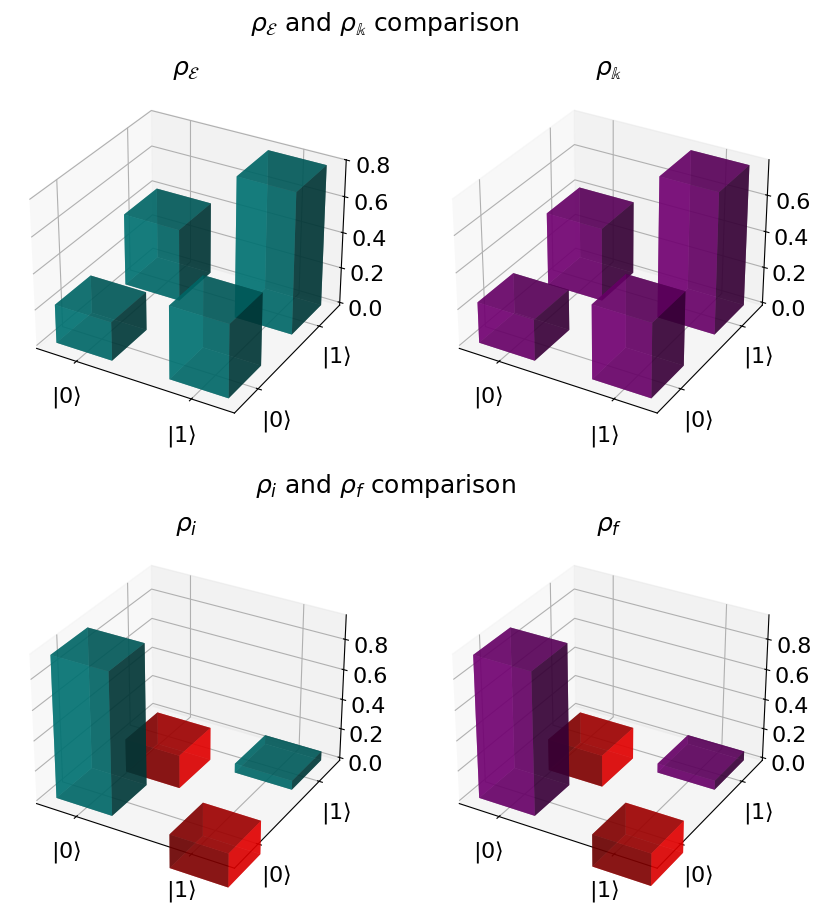

rho_rho3
tf.Tensor(0.008193323990000612, shape=(), dtype=float64)
rho2_rho2
tf.Tensor(0.008192202016001127, shape=(), dtype=float64)


In [9]:
#Fig 3
folder_path = '../../results/experiment_new/haar_random_matrix_comparison'
rho2_file_path = os.path.join(folder_path, 'rho2.txt')
rho2 = parse_tensor_from_file(rho2_file_path, 2)
            
rho_file_path = os.path.join(folder_path, 'rho.txt')
rho= parse_tensor_from_file(rho_file_path, 2)

rho3_file_path = os.path.join(folder_path, 'rho3.txt')
rho3= parse_tensor_from_file(rho3_file_path, 2)

rho2o_file_path = os.path.join(folder_path, 'rho2_kraus.txt')
rho2o= parse_tensor_from_file(rho2o_file_path, 2)

plot_array(rho2.numpy(), rho2o.numpy(), rho.numpy(), rho3.numpy(), "$\\rho_\\mathcal{E}$", "$\\rho_\\mathbb{k}$", 
           "$\\rho_i$", "$ \\rho_f$", "$\\rho_\\mathcal{E}$ and $\\rho_\\mathbb{k}$ comparison", 
           "$\\rho_i$ and $ \\rho_f$ comparison",
           "rho2_matrix")

print("rho_rho3")
fildelity03 = abs(1 - metrics.compilation_trace_fidelity(rho, rho3))
print(fildelity03)
print("rho2_rho2")
fildelity22 = abs(1 - metrics.compilation_trace_fidelity(rho2, rho2o))
print(fildelity22)

C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpl_toolkits\mplot3d\axes3d.py:2902: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
C:\Users\haime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


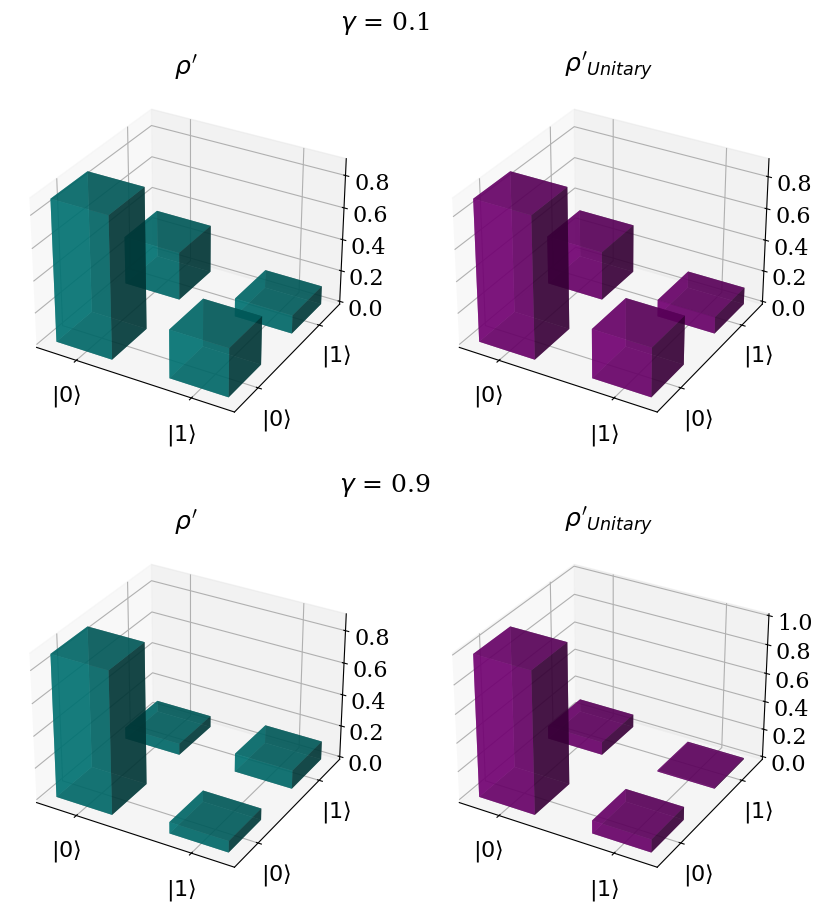

rho2_rho2
tf.Tensor(0.010351101828628417, shape=(), dtype=float64)
rho2_rho2_2
tf.Tensor(0.1092866280897139, shape=(), dtype=float64)


In [ ]:
#Fig 5
import base.epsilon_rho as epsilon_rho
folder_path = '../results/experiment_result_dephasing_2/1_qubits_0.100'
rho2_file_path = os.path.join(folder_path, 'rho2.txt')
rho2 = parse_tensor_from_file(rho2_file_path, 2)
            
rho_file_path = os.path.join("../results/experiment_result_dephasing_2", '1_qubits_rho.txt')
rho= parse_tensor_from_file(rho_file_path, 2)

unitary_file_path = os.path.join(folder_path, 'unitary.txt')
unitary= parse_tensor_from_file(unitary_file_path, 2)

rho2o= epsilon_rho.calculate_from_unitary(rho=rho.numpy(), unitary_matrix=unitary.numpy())

folder_path = '../results/experiment_result_dephasing_2/1_qubits_0.950'
rho2_file_path = os.path.join(folder_path, 'rho2.txt')
rho2_2 = parse_tensor_from_file(rho2_file_path, 2)

unitary_file_path = os.path.join(folder_path, 'unitary.txt')
unitary_2= parse_tensor_from_file(unitary_file_path, 2)

rho2o_2= epsilon_rho.calculate_from_unitary(rho=rho.numpy(), unitary_matrix=unitary_2.numpy())

plot_array(rho2.numpy(), rho2o, rho2_2.numpy(), rho2o_2, "$ \\rho'$", "$ \\rho'_{Unitary}$", 
           "$ \\rho'$", "$ \\rho'_{Unitary}$", "$ \\gamma$ = 0.1", 
           "$ \\gamma$ = 0.9",
           "rho2_matrix_dephasing_2")
print("rho2_rho2")
fildelity22 = abs(1 - metrics.compilation_trace_fidelity(rho2, rho2o))
print(fildelity22)

print("rho2_rho2_2")
fildelity22 = abs(1 - metrics.compilation_trace_fidelity(rho2_2, rho2o_2))
print(fildelity22)
         